# <center>**Model Comparison: ELM vs BP**</center>

### Importing Libraries and Configuring the Seaborn Style:

Here we start by importing needed libraries such as **matplotlib** for plots, **numpy** for numerical operations, **seaborn** to improve visualization, and **time** to measure execution time. **sns.set()** sets the aesthetic style of the plots according to the default Seaborn style.<br>
We also need to import the **Sequential** class from **tensorflow.keras.models**. The **Sequential** model is a linear stack of layers, which allows for neural networks layer by layer. **Dense** class from **tensorflow.keras.layers**, is the standard fully connected neural network layer in Keras.<be>

Finally, from **sklearn.metrics** We import specific functions to evaluate the performance of our models:
- **<font color='blue'>mean_squared_error</font>**: Calculates the mean squared error between the predicted and true values. It is a measure of the average squared difference between the predicted values and the actual values.
- **<font color='blue'>r2_score</font>**: Calculates the coefficient of determination (R-squared) between the predicted and true values. It is a measure of how well the predictions of the model explain the variability of the true values.
- **<font color='blue'>mean_absolute_error</font>**: Calculates the mean absolute error between the predicted and true values. It is a measure of the average absolute difference between the predicted values and the actual values.

In [1]:
import matplotlib. pyplot as plt
import numpy as np
from matplotlib.widgets import CheckButtons
import seaborn as sns
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set Seaborn style
sns.set()

### Variables Initialization:

Below, we initialize our variables including number of Samples **N**, number of inputs **n*$, number of outputs **m**, number of hidden nodes **L**, and number of test samples **NTest**.

In [2]:
# Initialize variables
N = 3000  # Number of Samples
n = 6  # Number of inputs
m = 1  # Number of outputs
L = 5  # Number of hidden nodes
NTest = 100  # Number of test samples

### Loading Data:

Data we will be using is loaded from the file named <font color='red'>'windSpeedData.txt'</font> using np.loadtxt() function.

In [3]:
# Load the data from 'windSpeedData.txt'
data = np.loadtxt('windSpeedData.txt')

### Data Processing:

We will divide the loaded data into **features** and **target**, where features contains 6 inputs and target will be a single output. <font color='red'>Otherwise, we will try to predict the 7th hourly wind speed based on 6 past values</font>.

In [4]:
# Split the Data
features = None
for i in range(N + NTest):
    X = data[i:i + n]
    features = (np.vstack((features, X)) if (features is not None) else X)

target = data[n: N + NTest + n].reshape(N+NTest, m)

X_train, X_test = features[:N], features[N:N + NTest]
y_train, y_test = target[:N], target[N:N + NTest]

### Extreme Learning Machine Algorithm (ELM):

**The Extreme Learning Machine** algorithm is a machine learning method that relies on artificial neural network with a single hidden layer. Unlike traditional supervised learning methods, ELM does not require itertive adjustment of the weights of connections between neurons, making it a particularly effective approach for high-dimensional problems. <br>
The fundamental principle is to randomly initialize the weights of the connections between the inputs and the hidden layer, and then analytically solve a least squares problem to obtain the optimal weights of the output layer. This approach achieves fast and accurate results, while reducing computational complexity compared to traditional neural learning methods. <br>

In the script below, we tried to:
- Define the function **ELM_predict()** to implement the ELM Algorithm.
- Randomly intitilize the weights **W_elm** and the bias vector **bias_elm**.
- Apply the algorithm to obtain prediction **y_pred_ELM**.

In [10]:
# Implement the ELM Algorithm
def ELM_predict(X_train, y_train, W, b):
    H = np.dot(X_train, W) + b
    H_inv = np.linalg.pinv(H)
    W_out = np.dot(H_inv, y_train)
    return W_out


W_elm = np.random.randn(n, L)
bias_elm = np.random.randn(m)

startELM = time.time()
# Predictions
W_out = ELM_predict(X_train, y_train, W_elm, bias_elm)
H_test = np.dot(X_test, W_elm)
endELM = time.time()
y_pred_ELM = np.dot(H_test, W_out)

### BackPropagation Algorithm:

Backpropagation is an algorithm used to train neural networks. It works by:

1. Forward Pass: Passing input data through the network to compute a predicted output.
2. Loss Calculation: Comparing the predicted output to the actual output using a loss function.
3. Backward Pass: Calculating gradients of the loss function with respect to each parameter using the chain rule.
4. Weight Update: Adjusting the weights of the network in the direction that minimizes the loss using an optimization algorithm like stochastic gradient descent.
5. Iterations: Repeating steps 1-4 iteratively to improve the model's predictions over multiple epochs.<br>

Backpropagation enables neural networks to learn from data by adjusting their parameters to minimize prediction errors, making it a fundamental algorithm in deep learning.<br>

In the following script, we try to:

- Create a neural network model using TensorFlow's Keres API using 3 Dense layers.
- Compile the model with Adam optimizer and mean squared error loss.
- Train the model using the traing data **(X_train, y_train)**.
- Make the predictions **y_pred_bp** using our trained backpropagation model.

In [11]:
# BackPropagation Model
model_bp = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
startBP = time.time()
# Compile the model
model_bp.compile(optimizer='adam', loss='mse')

# Train the model
model_bp.fit(X_train, y_train, epochs=20, batch_size=32)
endBP = time.time()
# Make predictions
y_pred_bp = model_bp.predict(X_test)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.5687
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3437
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0685
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1863
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3872
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8716
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5179
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3230
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.4600
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9371
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3904
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4586
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0422
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4912
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.9199
Epoch 1

### Creating a graph containing 3 curves : the Desired data, the predicted one using ELM, and the predicted one using BP

- Creation of plots:<br>
Three curves are plotted, including the desired output curve, the one predicted by the ELM (Extreme Learning Machine) and the one predicted by the BP (Back Propagation).
Each curve is associated with a label for the legend.
- Added checkboxes:<br>
Check boxes are added to allow the user to select which curves to display.
The checkboxes are initially all checked.
- Function to toggle the visibility of curves:<br>
A function is defined to toggle the visibility of curves when checkboxes are clicked.
It checks which checkbox is clicked and toggles the visibility of the corresponding curve.
- Axis configuration and graph display:<br>
Axis and chart titles are set.
The legend is displayed.
The interactive chart with check boxes is displayed.

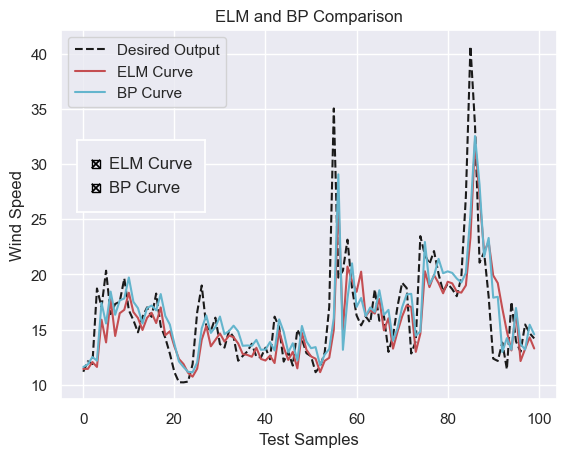

"# Plot curves\nplt.plot(y_test, label='Desired Ouput')\nplt.plot(y_pred_ELM, label='Predicted Output with ELM')\nplt.plot(y_pred_bp, label='Predicted Output with BP')\nplt.xlabel('Test Samples')\nplt.ylabel('Wind Speed')\nplt.title('ELM and BP Comparison')\nplt.legend()\nplt.show()"

In [12]:
# Create the plots
fig, ax = plt.subplots()
l0, = ax.plot(y_test, 'k--', label='Desired Output')
l1, = ax.plot(y_pred_ELM, 'r-', label='ELM Curve')
l2, = ax.plot(y_pred_bp, 'c-', label='BP Curve')

# Add checkboxes
rax = plt.axes([0.15, 0.5, 0.2, 0.15])
check = CheckButtons(rax, ('ELM Curve', 'BP Curve'), (True, True))


# Function to toggle visibility of the curves
def toggle_visibility(label):
    if label == 'ELM Curve':
        l1.set_visible(not l1.get_visible())
    elif label == 'BP Curve':
        l2.set_visible(not l2.get_visible())
    plt.draw()


check.on_clicked(toggle_visibility)
ax.set_xlabel('Test Samples')
ax.set_ylabel('Wind Speed')
ax.set_title('ELM and BP Comparison')
ax.legend()
plt.show()

# Note: The part of Checkbuttons of my script, actually doesn't work in jupyter notebook
# You can use the following commands to plot the curves the usual way.

"""# Plot curves
plt.plot(y_test, label='Desired Ouput')
plt.plot(y_pred_ELM, label='Predicted Output with ELM')
plt.plot(y_pred_bp, label='Predicted Output with BP')
plt.xlabel('Test Samples')
plt.ylabel('Wind Speed')
plt.title('ELM and BP Comparison')
plt.legend()
plt.show()"""

### Evaluation Metrics:

Mean squared error (MSE), coefficient of determination (R-squared), and mean absolute error (MAE) are calculated for ELM and BP predictions using **sklearn.metrics**.

In [13]:
# Calculate MSE and R2 for ELM
mse_elm = mean_squared_error(y_test, y_pred_ELM)
r2_elm = r2_score(y_test, y_pred_ELM)
mean_absolute_error_elm = mean_absolute_error(y_test, y_pred_ELM)
convergence_time_ELM = endELM - startELM

# Calculate MSE and R2 for BackPropagation
mse_bp = mean_squared_error(y_test, y_pred_bp)
r2_bp = r2_score(y_test, y_pred_bp)
mean_absolute_error_bp = mean_absolute_error(y_test, y_pred_bp)
convergence_time_BP = endBP - startBP

### Summary Report:

The script below prints a summary report comparing the performance of the ELM and backpropagation algorithms in terms of MSE, R-squared, mean absolute error, and convergence time.

In [14]:
# Print summary report
print("Summary Report:")
print("---------------")
print("ELM Algorithm:")
print("  MSE:", mse_elm)
print("  R-squared:", r2_elm)
print("  Mean Absolute Error:", mean_absolute_error_elm)
print("  Convergence Time:", convergence_time_ELM)

print("\nBackPropagation Algorithm:")
print("  MSE:", mse_bp)
print("  R-squared:", r2_bp)
print("  Mean Absolute Error:", mean_absolute_error_bp)
print("  Convergence Time:", convergence_time_BP)

Summary Report:
---------------
ELM Algorithm:
  MSE: 15.243664295138185
  R-squared: 0.358460650055081
  Mean Absolute Error: 2.390608284123837
  Convergence Time: 0.0019252300262451172

BackPropagation Algorithm:
  MSE: 14.064908975676685
  R-squared: 0.40806932069686586
  Mean Absolute Error: 2.3862040031433103
  Convergence Time: 6.836588144302368


### Performance Comparison:

Based on the resulted values from the previous script, this one determines which algorithm works better and prints the result.

In [15]:
# Compare algorithms
if mse_elm < mse_bp:
    print("\nELM Algorithm performs better in terms of MSE.")
elif mse_elm > mse_bp:
    print("\nBackPropagation Algorithm performs better in terms of MSE.")
else:
    print("\nBoth algorithms have similar MSE.")

if r2_elm > r2_bp:
    print("ELM Algorithm performs better in terms of R-squared.")
elif r2_elm < r2_bp:
    print("BackPropagation Algorithm performs better in terms of R-squared.")
else:
    print("Both algorithms have similar R-squared.")

if convergence_time_ELM < convergence_time_BP:
    print("ELM Algorithm converges faster than BackPropagation.")
elif convergence_time_ELM > convergence_time_BP:
    print("BackPropagation Algorithm converges faster than ELM.")
else:
    print("Both algorithms converges at the same time.")


BackPropagation Algorithm performs better in terms of MSE.
BackPropagation Algorithm performs better in terms of R-squared.
ELM Algorithm converges faster than BackPropagation.


# <center>**Conclusion**</center>

Data obtained from the ELM and backpropagation (BP) algorithms reveal contrasting performances, each with its own advantages and disadvantages.

The ELM algorithm showed initial performance with fast convergence, but its predictive results were less satisfactory than those of BP. Indeed, although the ELM displayed rapid convergence, it produced less accurate predictions with higher MSE, lower R-squared, and larger mean absolute error.

In contrast, BP outperformed ELM in terms of predictive accuracy. Despite longer convergence time, BP achieved better performance with lower MSE, higher R-squared, and lower mean absolute error.

In conclusion, although ELM can provide fast convergence, BP is preferable when higher predictive performance is needed. The choice between the two algorithms should be based on the specific needs of the application and the tradeoffs between speed of convergence and predictive accuracy.